# Data Analysis of Metal Organic Profile

#### This is a project to investigate how 
SBET(m2/g)-bet surface

SL(m2/g) - largest cavity diameter 

VT(cm3/g) - pore volume 

Influences the CO2 update capacity of the metal organic profile

In [55]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# regression 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

pd.set_option('future.no_silent_downcasting', True)

In [7]:
# read dataset in 
df = pd.read_excel('data/mof_dataset.xlsx')

# inspect first five enteries
df.head(5)

,Sample,SBET(m2/g),SL(m2/g),VT(cm3/g),P(kPa),T(K),Mental center,Uptake
0,"Al(OH)(bdc)(Arstad et al., 2008)",1300.0,,0.42,100,298,Al,2.388410
1,"Al(OH)(bdc-NH2)(Arstad et al., 2008)",960.0,NaN,0.25,100,298,Al,2.732163
2,"Ni2(bdc)2(dabco)(Arstad et al., 2008)",1925.0,NaN,0.74,100,298,Ni,2.276802
3,"Ni2(bdc)2(dabco)(Arstad et al., 2008)",1530.0,NaN,0.50,100,298,Ni,3.187523
4,"Zn(bdc)(ted)0.5 (Raja et al., 2015)",1937.0,2057,0.75,100,298,Zn,1.683048


In [8]:

# inspect last five entries
df.tail(5)

,Sample,SBET(m2/g),SL(m2/g),VT(cm3/g),P(kPa),T(K),Mental center,Uptake
245,"SNU-70(Prasad and Suh, 2012)",5290.0,6100,2.17,100,298,Zn,0.8
246,"FJI-H14(Liang et al., 2017)",904.0,1004,0.45,100,195,Cu,12.5
247,"FJI-H14(Liang et al., 2017)",904.0,1004,0.45,100,298,Cu,7.6
248,"Ni(BPEB)(Galli et al., 2014)",1900.0,2378,1.00,100,195,Ni,11.6
249,"α-[Zn(BPEB)](Galli et al., 2014)",985.0,1224,0.60,100,195,Zn,11.3


In [9]:
# # Rename the features to minimize typing
# columns = df.columns
# new_columns = ['sbet', 'sl', 'vt', 'p', 't','metal_center', 'update']
# df = df.rename(columns = {'SBET(m2/g)':"sbet", 'SL(m2/g)':'sl', 'VT(cm3/g)':'vt', 'P(kPa)':'p', 'T(K)':'t','Mental center':'metal_center', 'Uptake':'update'})

In [10]:
# dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sample         250 non-null    object 
 1   SBET(m2/g)     225 non-null    float64
 2   SL(m2/g)       124 non-null    object 
 3   VT(cm3/g)      164 non-null    float64
 4   P(kPa)         250 non-null    int64  
 5   T(K)           250 non-null    int64  
 6   Mental center  250 non-null    object 
 7   Uptake         250 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 15.8+ KB


In [11]:
# describe the dataset 
print(df.describe())

        SBET(m2/g)   VT(cm3/g)       P(kPa)        T(K)      Uptake
count   225.000000  164.000000   250.000000  250.000000  250.000000
mean   1370.618756    0.586512   432.640000  288.148000    4.268618
std     968.599843    0.442267   941.473761   17.638895    5.435044
min      30.000000    0.037000    10.000000  195.000000    0.093000
25%     732.000000    0.320000   100.000000  273.000000    1.391751
50%    1084.000000    0.457500   100.000000  298.000000    2.408134
75%    1859.250000    0.710000   100.000000  298.000000    3.887164
max    5290.000000    2.300000  4000.000000  313.000000   26.300000


In [12]:
# checking null values
print(df.isnull().any())

Sample           False
SBET(m2/g)        True
SL(m2/g)          True
VT(cm3/g)         True
P(kPa)           False
T(K)             False
Mental center    False
Uptake           False
dtype: bool


In [13]:
# functions
def missing_values_table(df):
    # total missing values
    mis_val = df.isnull().sum()

    # percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # make a table with the results
    mis_val_table = pd
from sklearn.model_selection import train_test_split
from sklearn.
ns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0:'Missing values', 1:'% of total values' })

    # sort the table by percentage of missing descending
#    mis_val_table_ren_columns = [mis_val_table_ren_columns.iloc[:,1] != 0].sort_value('% of total values', ascending=False).round(1)

    # print some summary information 
    print('Your selected dataframe has ' + str(df.shape[1]) + 'columns \n There are ' + str(mis_val_table_ren_columns.shape[0]) + "columns have missing values.")

    # return the dataframe with missing information 
    return mis_val_table_ren_columns

### Data Cleaning

In [14]:
missing_values_table(df)

Your selected dataframe has 8columns 
 There are 8columns have missing values.


,Missing values,% of total values
Sample,0,0.0
SBET(m2/g),25,10.0
SL(m2/g),126,50.4
VT(cm3/g),86,34.4
P(kPa),0,0.0
T(K),0,0.0
Mental center,0,0.0
Uptake,0,0.0


In [15]:
# df['SBET(m2/g)'] is clean
df['SBET(m2/g)'].isnull().any().sum()

np.int64(1)

In [16]:
# investigage sbet
# from the describe above, it is evident that there could be an 
# outlier in df['sbet'] given max value 5290 and 75% being 1859
# missing values will be filled with the mode that is not affected by outlier
df['SBET(m2/g)'] = df['SBET(m2/g)'].fillna(value = df['SBET(m2/g)'].mode()[0])
df['VT(cm3/g)'] = df['VT(cm3/g)'].fillna(value = df['VT(cm3/g)'].mode()[0])
df['SL(m2/g)'] = df['SL(m2/g)'].fillna(value = df['SL(m2/g)'].mode()[0])

# confirm missing values filled
missing_values_table(df)

Your selected dataframe has 8columns 
 There are 8columns have missing values.


,Missing values,% of total values
Sample,0,0.0
SBET(m2/g),0,0.0
SL(m2/g),0,0.0
VT(cm3/g),0,0.0
P(kPa),0,0.0
T(K),0,0.0
Mental center,0,0.0
Uptake,0,0.0


In [17]:
# on an attempt to convert df['SL(m2/g)'] to float, not int because int will cause some data loss,
# it was reported that string cannot be converted to float
# on investigation show below, it was discovered that some entries might not be just be NaN, Not a Number, but empty string

df['SL(m2/g)'][:5]

0        
1     110
2     110
3     110
4    2057
Name: SL(m2/g), dtype: object

In [18]:
# Get the indices of all empty string values
for i in df['SL(m2/g)']:
    if type(i) == str:
        print(f"i = '{i}'")
        print(list(df['SL(m2/g)']).index(i))


i = ' '
0


In [19]:
# replace df['SL(m2/g)'] with df['SL(m2/g)'].mode()[0]
df['SL(m2/g)'] = df['SL(m2/g)'].replace(' ', df['SL(m2/g)'].mode()[0])

In [20]:
# make sure no empty string exists in the data frame
df.replace(' ', df['SL(m
from sklearn.model_selection import train_test_split
from sklearn.
2/g)'].mode()[0], inplace = True)
df['SL(m2/g)'][:5]

0     110
1     110
2     110
3     110
4    2057
Name: SL(m2/g), dtype: object

In [56]:
# convert df['SL(m2/g)'] to float
df['SL(m2/g)'] = df['SL(m2/g)'].apply(lambda x : float(x) )
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sample         250 non-null    object 
 1   SBET(m2/g)     250 non-null    float64
 2   SL(m2/g)       250 non-null    float64
 3   VT(cm3/g)      250 non-null    float64
 4   P(kPa)         250 non-null    int64  
 5   T(K)           250 non-null    int64  
 6   Mental center  250 non-null    object 
 7   Uptake         250 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 15.8+ KB


### **Exploratory Data Analysis**

#### **Univariate Analysis**

### SL(m2/g)

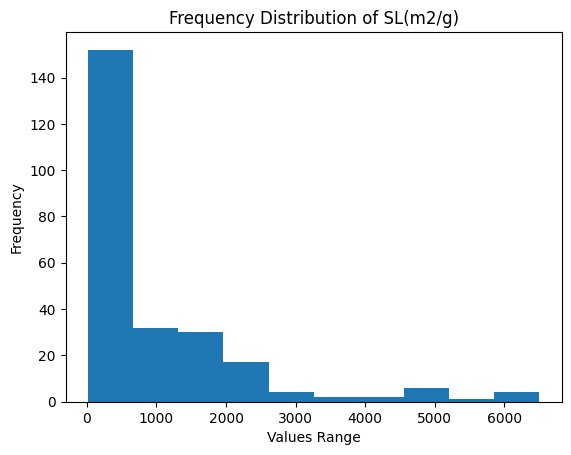

In [22]:
plt.hist(df['SL(m2/g)'])
plt.title("Frequen
from sklearn.model_selection import train_test_split
from sklearn.
cy Distribution of SL(m2/g)")
plt.xlabel('Values Range')
plt.ylabel('Frequency')
plt.show();

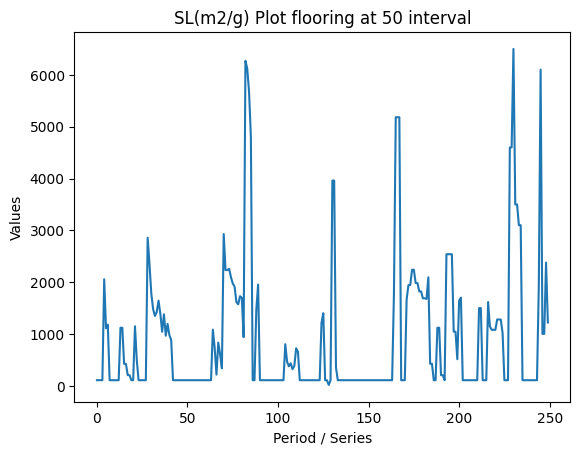

In [23]:
plt.plot(df['SL(m2/g)'])
plt.title("SL(m2/g) Plot flooring at 50 interval")
plt.xlabel("Period / Series")
plt.ylabel("Values")
plt.show();

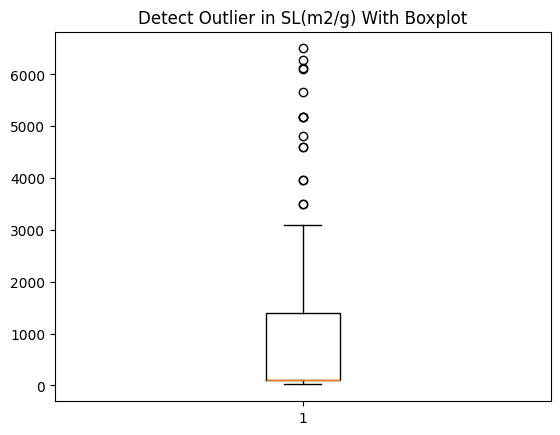

In [24]:
# checking outlier with boxplot
plt.boxplot(df['SL(m2/g)'])
plt.title("Detect Outlier in SL(m2/g) With Boxplot")
plt.show();

### SBET(m2/g)

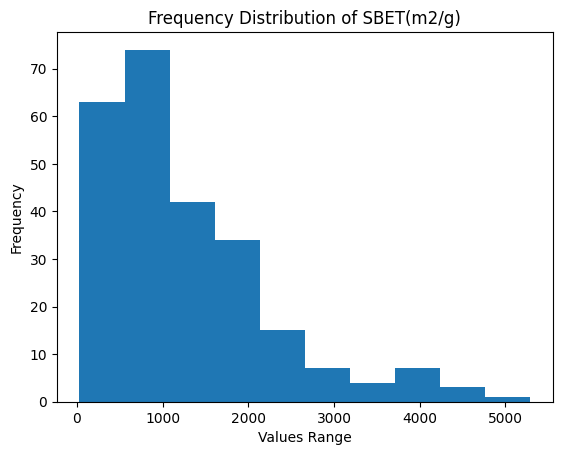

In [25]:
plt.hist(df['SBET(m2/g)'])
plt.title("Frequency Distribution of SBET(m2/g)")
plt.xlabel('Values Range')
plt.ylabel('Frequency')
plt.show();

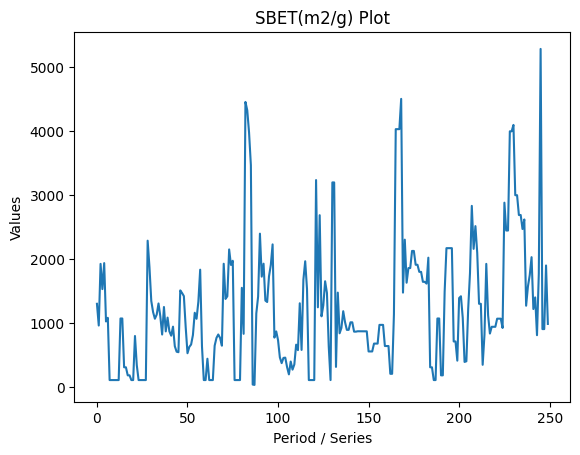

In [26]:
plt.plot(df['SBET(m2/g)'])
plt.title("SBET(m2/g) Plot")
plt.xlabel("Period / Series")
plt.ylabel("Values")
plt.show();

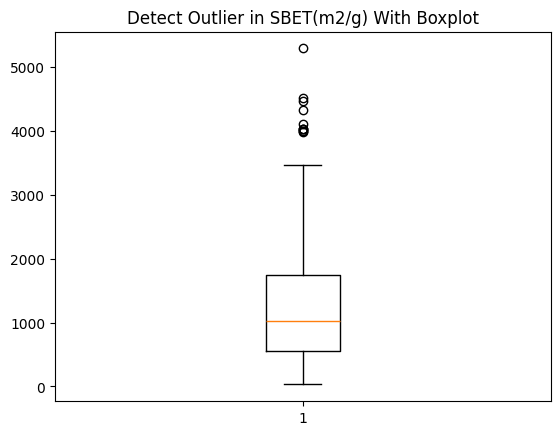

In [27]:
# checking outlier with boxplot
plt.boxplot(df['SBET(m2/g)'])
plt.title("Detect Outlier in SBET(m2/g) With Boxplot")
plt.show();

### VT(cm3/g)

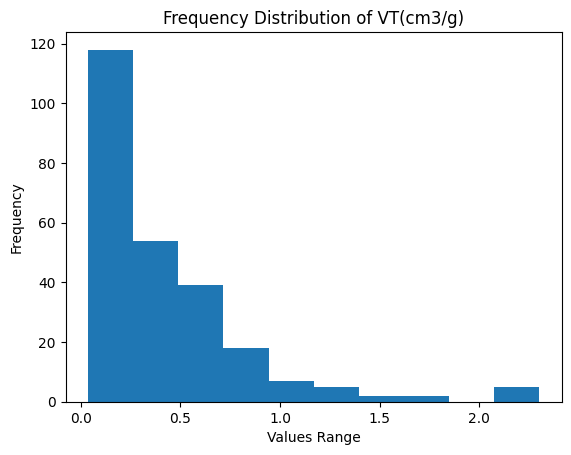

In [28]:
plt.hist(df['VT(cm3/g)'])
plt.title("Frequency Distribution of VT(cm3/g)")
plt.xlabel('Values Range')
plt.ylabel('Frequency')
plt.show();

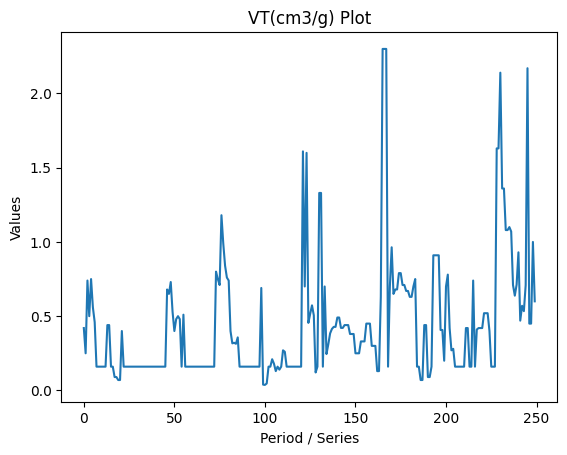

In [29]:
plt.plot(df['VT(cm3/g)'])
plt.title("VT(cm3/g) Plot")
plt.xlabel("Period / Series")
plt.ylabel("Values")
plt.show();

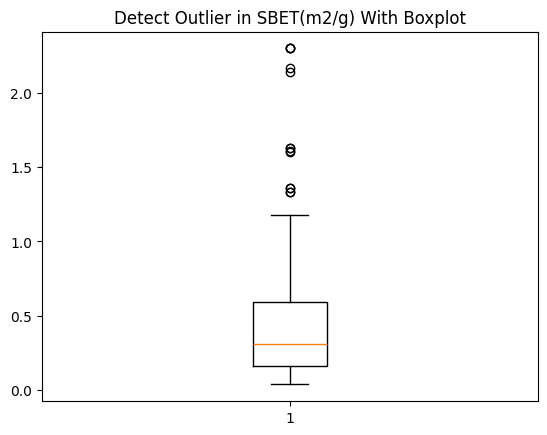

In [30]:
# checking outlier with boxplot
plt.boxplot(df['VT(cm3/g)'])
plt.title("Detect Outlier in SBET(m2/g) With Boxplot")
plt.show();

### P(kPa)

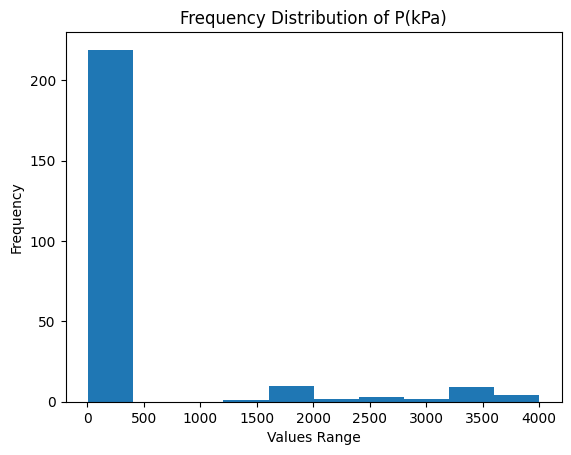

In [31]:
plt.hist(df['P(kPa)'])
plt.title("Frequency Distribution of P(kPa)")
plt.xlabel('Values Range')
plt.ylabel('Frequency')
plt.show();

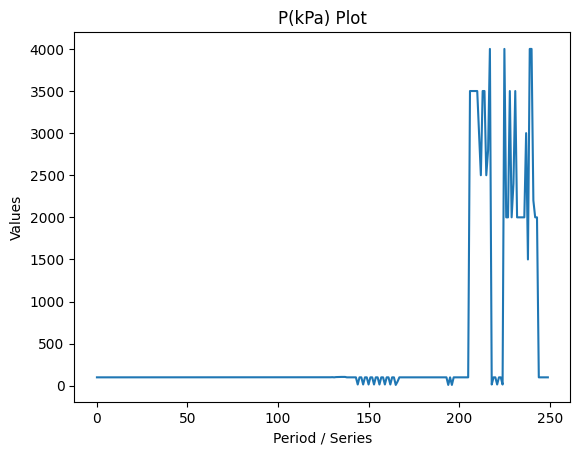

In [32]:
plt.plot(df['P(kPa)'])
plt.title("P(kPa) Plot")
plt.xlabel("Period / Series")
plt.ylabel("Values")
plt.show();

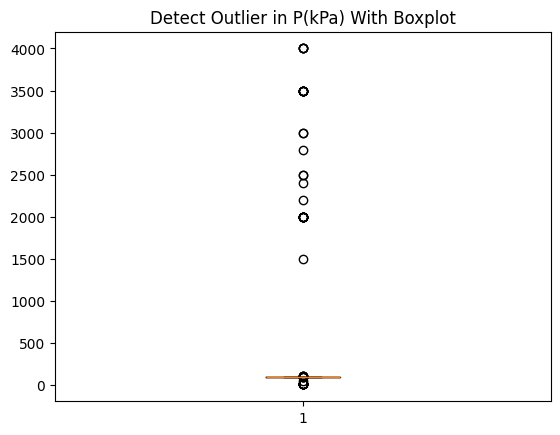

In [33]:
# checking outlier with boxplot
plt.boxplot(df['P(kPa)'])
plt.title("Detect Outlier in P(kPa) With Boxplot")
plt.show();

### T(K)

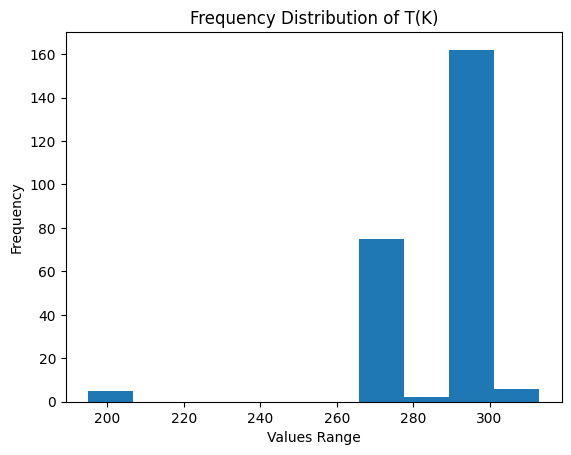

In [34]:
plt.hist(df['T(K)'])
plt.title("Frequency Distribution of T(K)")
plt.xlabel('Values Range')
plt.ylabel('Frequency')
plt.show();

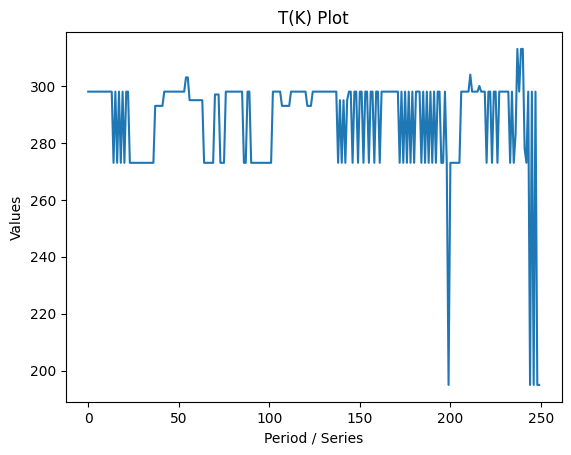

In [35]:
plt.plot(df['T(K)'])
plt.title("T(K) Plot")
plt.xlabel("Period / Series")
plt.ylabel("Values")
plt.show();

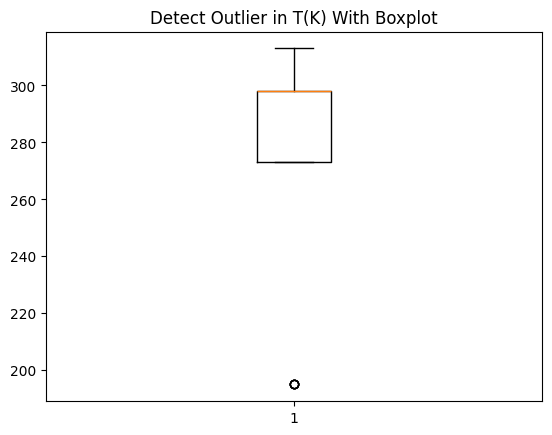

In [36]:
# checking outlier with boxplot
plt.boxplot(df['T(K)'])
plt.title("Detect Outlier in T(K) With Boxplot")
plt.show();
plt.plot(df['T(K)'])
plt.title("T(K) Plot")
plt.xlabel("Period / Series")
plt.ylabel("Values")
plt.show();

### Update

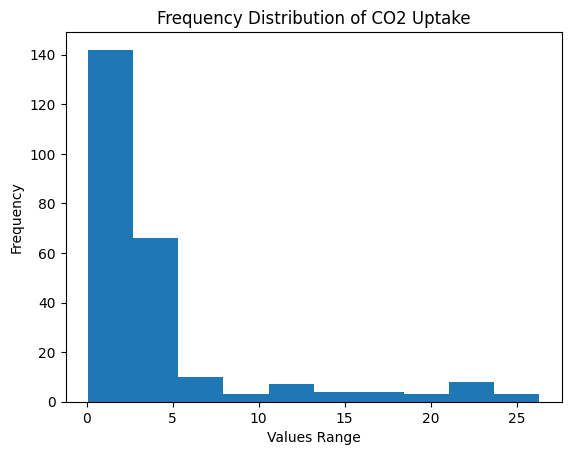

In [37]:
plt.hist(df['Uptake'])
plt.title("Frequency Distribution of CO2 Uptake")
plt.xlabel('Values Range')
plt.ylabel('Frequency')
plt.show();

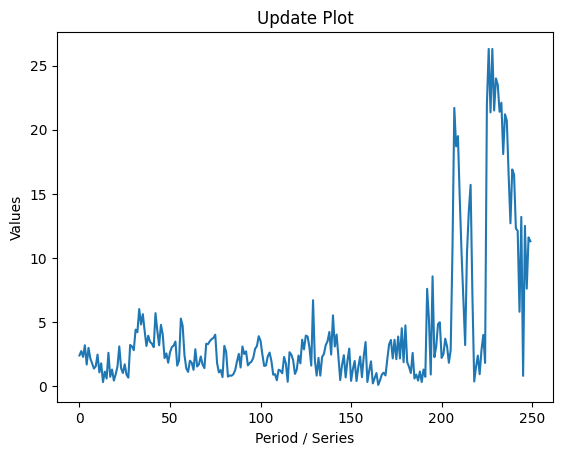

In [57]:
plt.plot(df['Uptake'])
plt.title("Update Plot")
plt.xlabel("Period / Series")
plt.ylabel("Values")
plt.show();

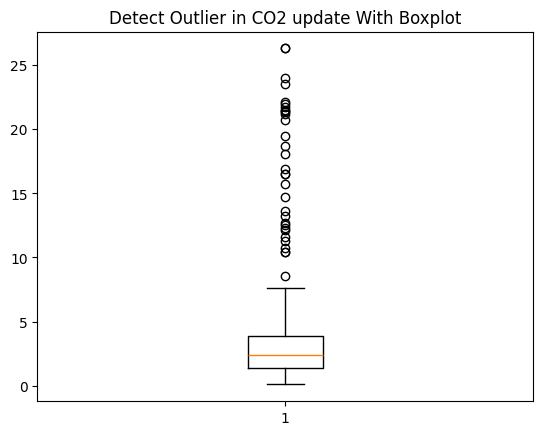

In [39]:
# checking outlier with boxplot
plt.boxplot(df['Uptake'])
plt.title("Detect Outlier in CO2 update With Boxplot")
plt.show();


In [40]:
# Remove outliers from df['SL(m2/g)'], df['SBET(m2/g)'] and df['VT(cm3/g)']
df1 = df[(df['SL(m2/g)'] < 2850) & (df['SBET(m2/g)'] < 3000) & (df['VT(cm3/g)'] < 1)]

print(f"Number of row : {df1.shape[0]} \nNumber of columns : {df1.shape[1]}")

Number of row : 224 
Number of columns : 8


In [41]:
df.columns

Index(['Sample', 'SBET(m2/g)', 'SL(m2/g)', 'VT(cm3/g)', 'P(kPa)', 'T(K)',
       'Mental center', 'Uptake'],
      dtype='object')

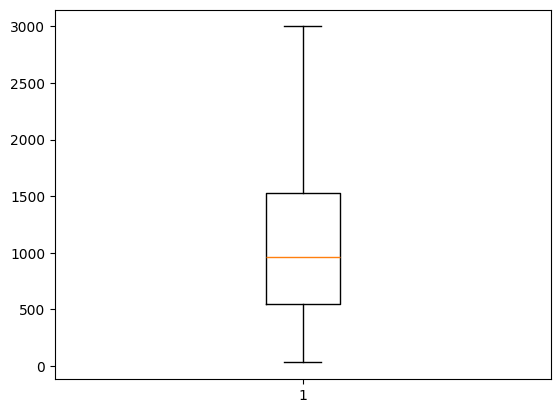

In [42]:
plt.boxplot(df[df['SBET(m2/g)'] < 3200]['SBET(m2/g)'])
plt.show()

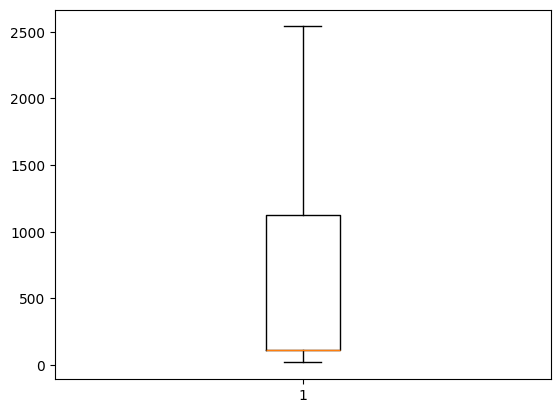

In [43]:
plt.boxplot(df[df['SL(m2/g)'] < 2850]['SL(m2/g)'])

plt.show();

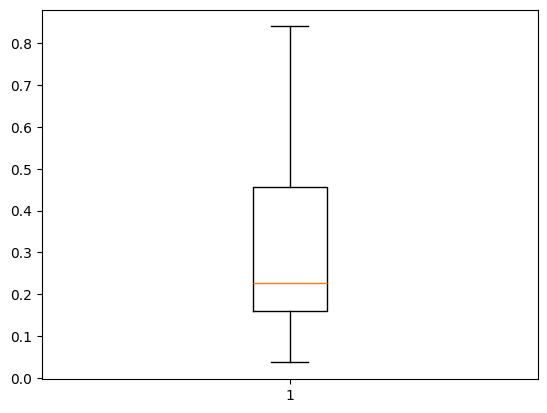

In [44]:
plt.boxplot(df[df['VT(cm3/g)'] < 0.9]['VT(cm3/g)'])
plt.show()

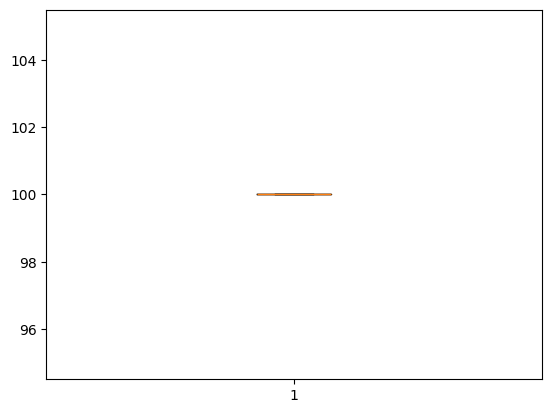

In [45]:
plt.boxplot(df[(df['P(kPa)'] <= 100) & (df['P(kPa)'] >= 80)]['P(kPa)'])
plt.show()

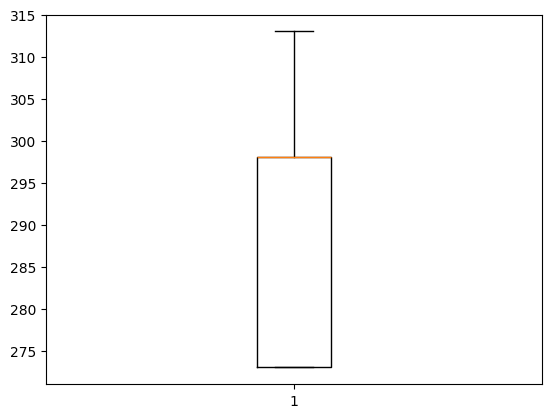

In [46]:
plt.boxplot(df[df['T(K)'] > 200]['T(K)'])

plt.show();

In [47]:
# remove outliers
clean_df = df[(df['SBET(m2/g)'] < 3200) & (df['SL(m2/g)'] < 2850) & (df['VT(cm3/g)'] < 0.9) & (df['P(kPa)'] <= 100) & (df['P(kPa)'] >= 80) & (df['T(K)'] > 200)]
clean_df.shape

(175, 8)

### **Bivariate Analysis**

In [48]:
# CO2 update against : 'SBET(m2/g)', 'SL(m2/g)', 'VT(cm3/g)', 'P(kPa)', 'T(K)'

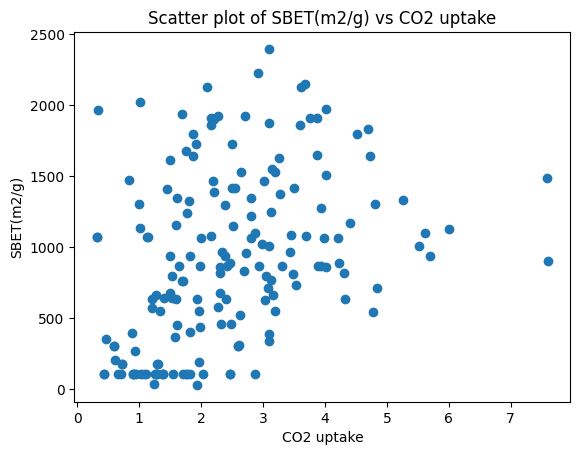

In [49]:
plt.scatter(x = clean_df['Uptake'], y = clean_df['SBET(m2/g)'])
plt.title("Scatter plot of SBET(m2/g) vs CO2 uptake")
plt.xlabel("CO2 uptake")
plt.ylabel('SBET(m2/g)')
plt.show();

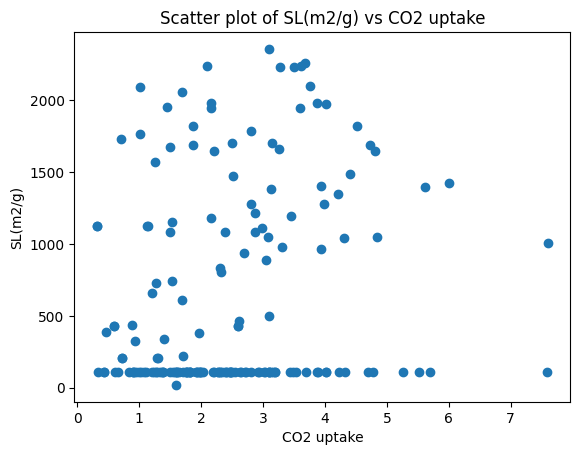

In [50]:
plt.scatter(x = clean_df['Uptake'], y = clean_df['SL(m2/g)'])
plt.title("Scatter plot of SL(m2/g) vs CO2 uptake")
plt.xlabelplt.plot(clean_df['T(K)'])
plt.title("T(K) Plot")
plt.xlabel("Period / Series")
plt.ylabel("Values")
plt.show();("CO2 uptake")
plt.ylabel('SL(m2/g)')
plt.show();

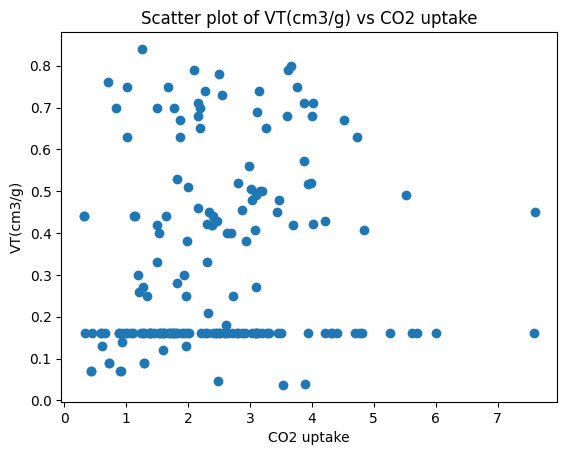

In [51]:
plt.scatter(x = clean_df['Uptake'], y = clean_df['VT(cm3/g)'])
plt.title("Scatter plot of VT(cm3/g) vs CO2 uptake")
plt.xlabel("CO2 uptake")
plt.ylabel('VT(cm3/g)')
plt.show();

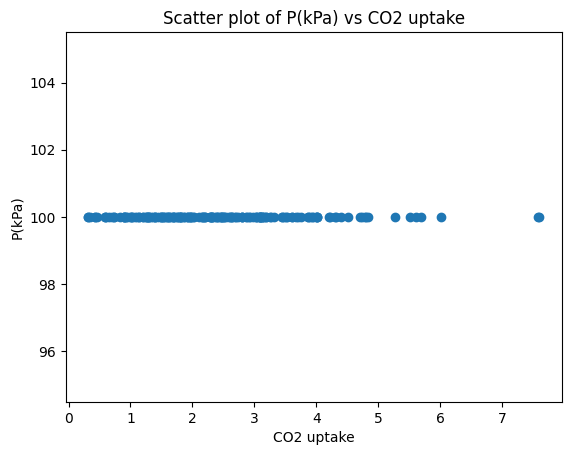

In [52]:
plt.scatter(x = clean_df['Uptake'], y = clean_df['P(kPa)'])
plt.title("Scatter plot of P(kPa) vs CO2 uptake")
plt.xlabel("CO2 uptake")
plt.ylabel('P(kPa)')
plt.show();

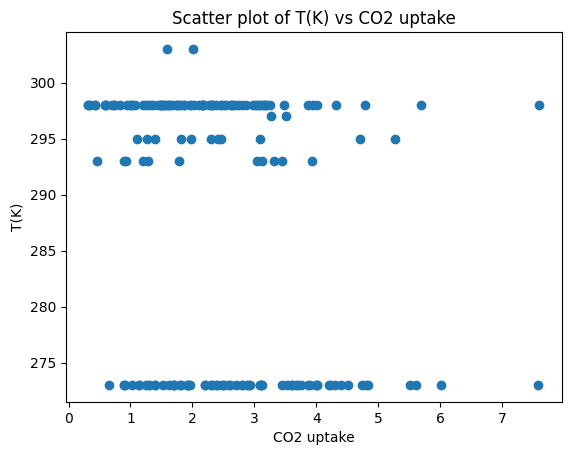

In [53]:
plt.scatter(x = clean_df['Uptake'], y = clean_df['T(K)'])
plt.title("Scatter plot of T(K) vs CO2 uptake")
plt.xlabel("CO2 uptake")
plt.ylabel('T(K)')
plt.show();

In [59]:
df_corr = clean_df[['SBET(m2/g)', 'SL(m2/g)', 'VT(cm3/g)', 'P(kPa)', 'T(K)', 'Uptake']].corr()
df_corr

,SBET(m2/g),SL(m2/g),VT(cm3/g),P(kPa),T(K),Uptake
SBET(m2/g),1.000000,0.495824,0.527871,NaN,-0.094959,0.373827
SL(m2/g),0.495824,1.000000,0.493934,NaN,-0.062592,0.208041
VT(cm3/g),0.527871,0.493934,1.000000,NaN,0.113086,0.135036
P(kPa),NaN,NaN,NaN,NaN,NaN,NaN
T(K),-0.094959,-0.062592,0.113086,NaN,1.000000,-0.249943
Uptake,0.373827,0.208041,0.135036,NaN,-0.249943,1.000000


From the correlation table above, CO2 Uptake shows the highest relationship, which is only 0.373827, very small. And therefore, I conclude that there is no relationship between the features and CO2 update in the metal organic framwork

<Axes: >

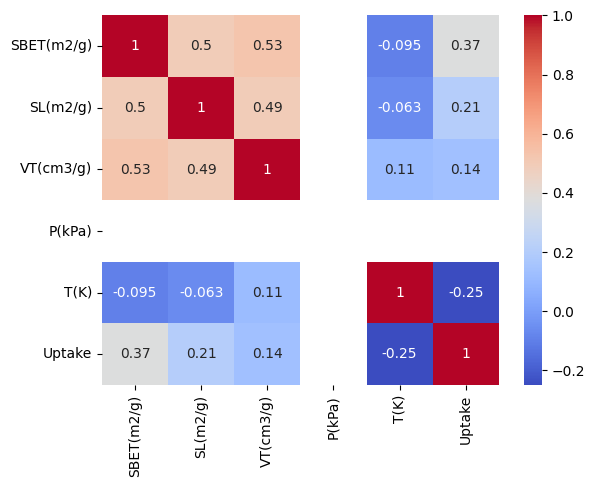

In [61]:
sns.heatmap(df_corr, annot = True, cmap = 'coolwarm')

Model Building

**Splittig** the dataset into train and test datasets

In [63]:
clean_df.columns

Index(['Sample', 'SBET(m2/g)', 'SL(m2/g)', 'VT(cm3/g)', 'P(kPa)', 'T(K)',
       'Mental center', 'Uptake'],
      dtype='object')

In [66]:
X = clean_df[['SBET(m2/g)', 'SL(m2/g)', 'VT(cm3/g)', 'P(kPa)', 'T(K)']]
y = clean_df['Uptake']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [71]:
print(f"X train shape: {X_train.shape} | X test shape {X_test.shape}")
print(f"y train shape: {y_train.shape} | y test shape: {y_test.shape}")

X train shape: (35, 5) | X test shape (140, 5)
y train shape: (35,) | y test shape: (140,)


In [72]:
# instantiate the model
reg_model = LinearRegression()

# fit the model
reg_model.fit(X_train, y_train)

LinearRegression()

In [75]:
# print intercepts
pd.DataFrame(list(zip(X, reg_model.coef_)), columns=['Features', 'Intercepts'])

,Features,Intercepts
0,SBET(m2/g),0.000186
1,SL(m2/g),-0.000334
2,VT(cm3/g),2.354674
3,P(kPa),0.000000
4,T(K),-0.028613


In [76]:
# Predicting the test and train set results
y_pred = reg_model.predict(X_test)
y_train_pred = reg_model.predict(X_train)

In [78]:
print("Predicted test y")
y_pred[:20]

Predicted test y


array([1.48474993, 3.41782685, 1.79347164, 2.3566464 , 3.35040347,
       3.22288149, 1.79527116, 1.62845422, 3.21343332, 2.49902347,
       1.69667055, 1.84464599, 3.18229938, 2.60088321, 2.1768988 ,
       1.69667055, 3.32315664, 2.01077871, 2.41199102, 2.2000704 ])

In [79]:
# compare actual vs predicted values
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred})
reg_model_diff

,Actual value,Predicted value
187,0.432000,1.484750
176,3.869643,3.417827
109,0.455360,1.793472
148,1.980000,2.356646
172,3.602500,3.350403
...,...,...
181,1.866071,2.562374
154,1.500000,2.203193
17,0.727684,1.513249
74,3.758956,3.473253


In [81]:
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
r2  = np.sqrt(mse)

errors = pd.DataFrame([[mse, mae, r2]], columns=['Mean Squared Error', "Mean Absolute Errpr", "Root Mean Squared"])
errors

,Mean Squared Error,Mean Absolute Errpr,Root Mean Squared
0,1.697344,0.988801,1.302821


**Conclusion**
No relationship was found with the parameters and CO2 update
The data is has many errors mostly because, the data was assembled from different sources. The could have introduced many errors pertaining to scale of the devices  that took the readings.